# Playing Around with Petals

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

### 1. EDA

#### 1.1 Load Iris Data

In [5]:
iris_dataset = load_iris()
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(f'Iris Dataset Shape: {iris_dataset.data.shape}')
print(f'Target Names: {iris_dataset.target_names}')
print(f'Features: {iris_dataset.feature_names}')
iris_dataset.data[:5, :]

Iris Dataset Shape: (150, 4)
Target Names: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
iris_df = pd.DataFrame(iris_dataset.data, columns = iris_dataset.feature_names)
X = iris_df
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
iris_df.isin([np.inf, -np.inf])
np.isinf(iris_df).values.sum()

0

In [9]:
iris_y = pd.DataFrame(iris_dataset.target)
iris_y

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


### 1.2 Bar Plot

In [11]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
pd.unique(pd.Series(iris_dataset.target))

array([0, 1, 2])

In [13]:
iris_y.value_counts()

0    50
1    50
2    50
Name: count, dtype: int64

Text(0, 0, "['setosa' 'versicolor' 'virginica']")

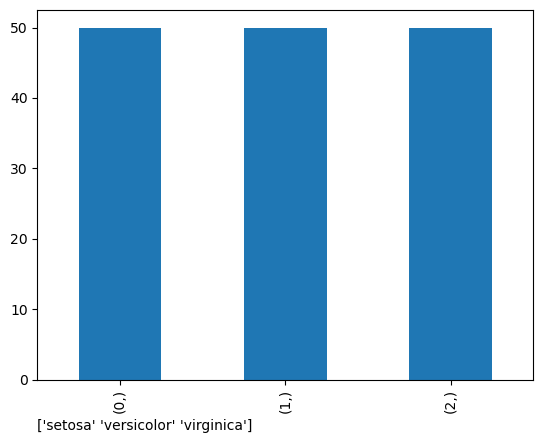

In [14]:
ax = iris_y.value_counts().plot(kind='bar')
ax.set_xlabel(iris_dataset.target_names[pd.unique(pd.Series(iris_dataset.target))], loc='left')

### 1.2 Pairplot

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

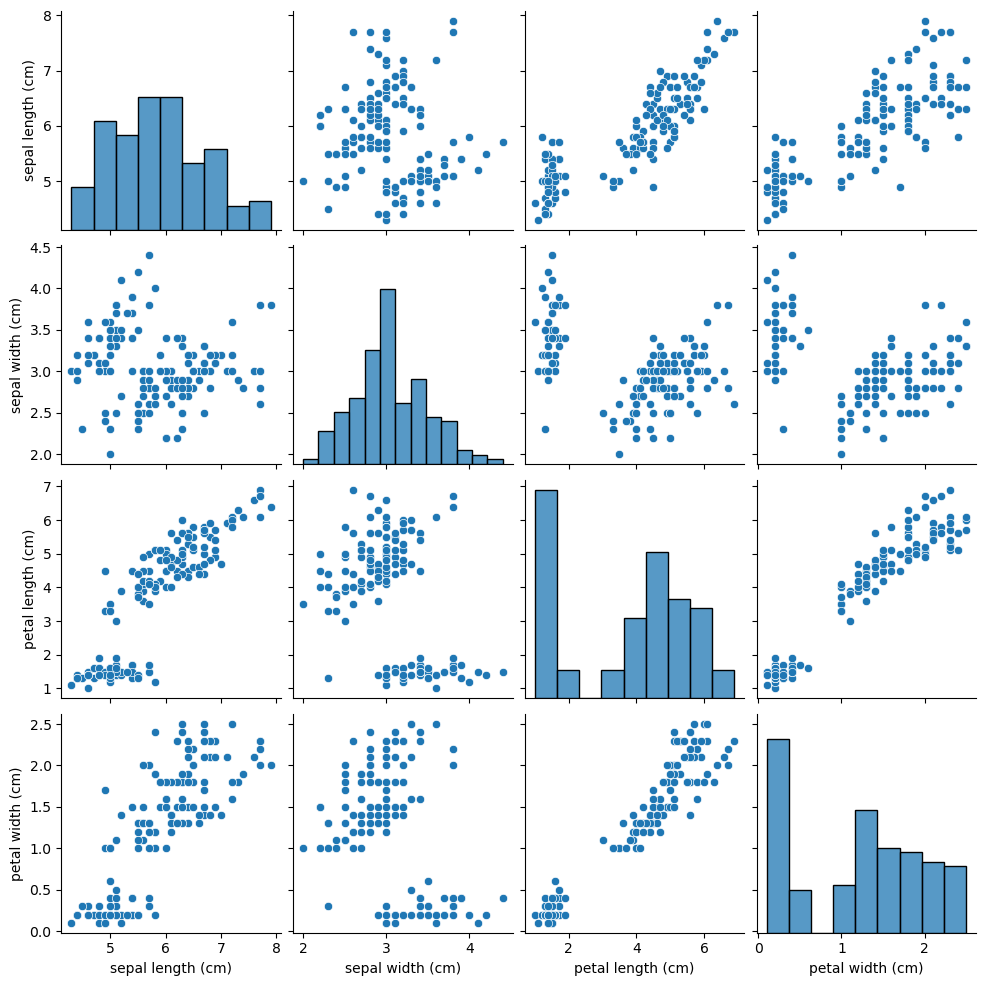

In [16]:
# Pairplot using Seaborn
axes = sns.pairplot(iris_df)

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

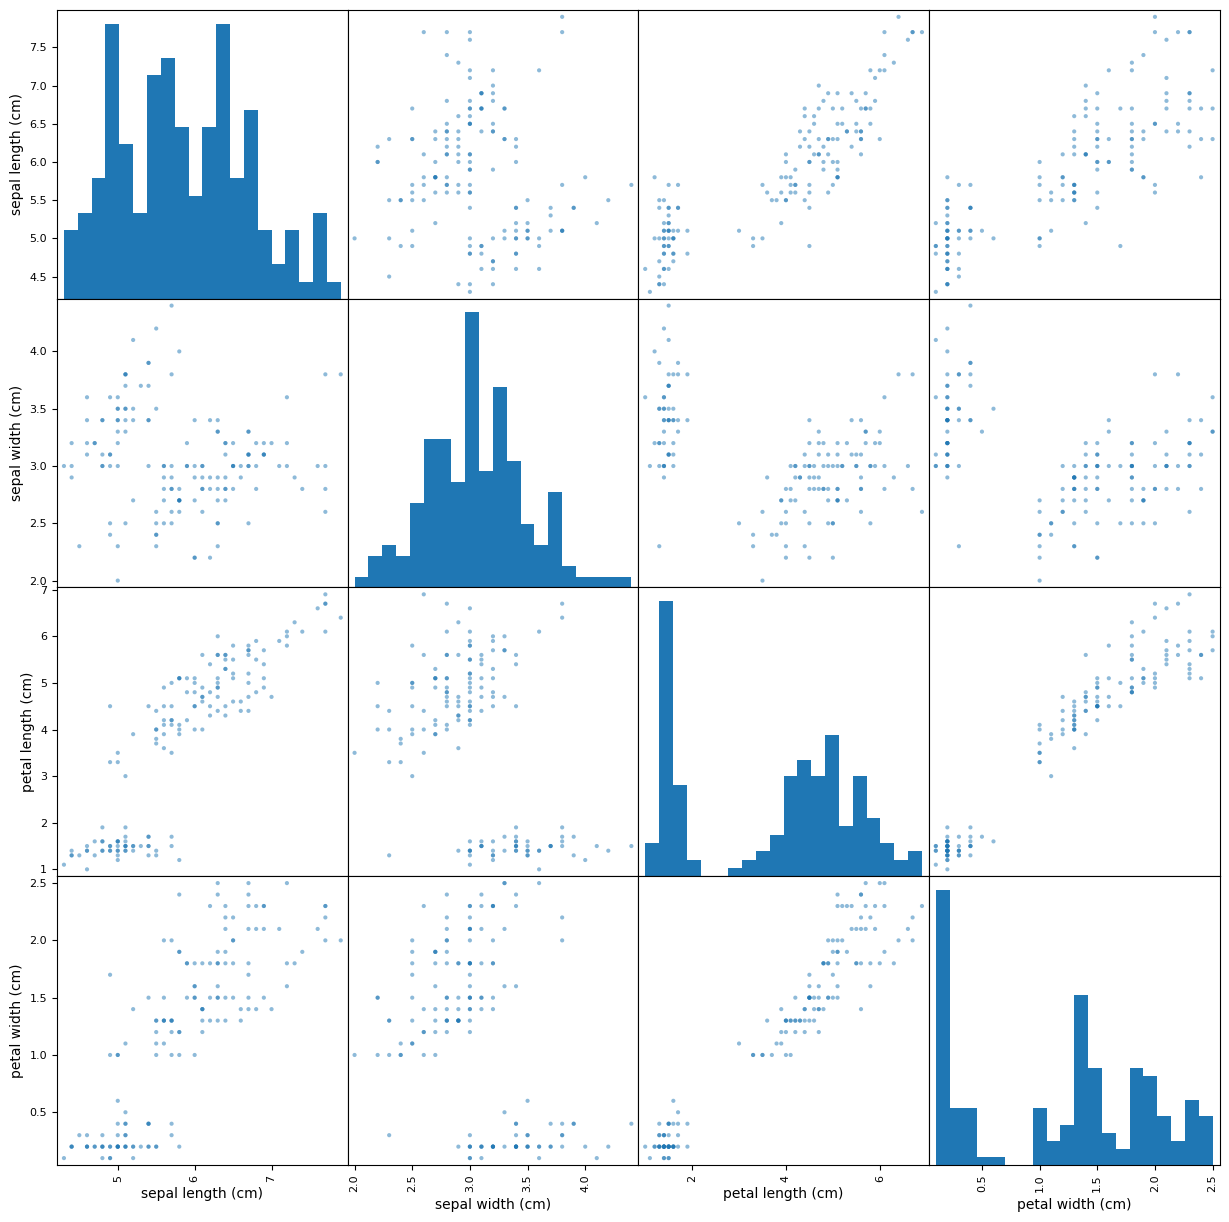

In [17]:
# Pairplot using Pandas
pd.plotting.scatter_matrix(iris_df, figsize=(15, 15), hist_kwds={'bins': 20})

### 2 Train Test Split

In [19]:
print(iris_dataset.data.shape)
print(iris_dataset.target.shape)

(150, 4)
(150,)


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data, iris_dataset.target, random_state=42)

In [22]:
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (112, 4)
y_train: (112,)
X_test: (38, 4)
y_test: (38,)


### 3 K-Nearest Neighbors

#### 3.1 N_Neighbors = 1

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

##### 3.1.1 Train

In [27]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

##### 3.1.2 Make Predictions

In [29]:
# Make predictions

X_sample = np.array([[5, 2.9, 1, 0.2]])

# Note: scikit-learn always expects 2D arrays for the data
print(f'Sample shape: {X_sample.shape}')

Sample shape: (1, 4)


In [30]:
prediction = knn.predict(X_sample)
print(f'Prediction: {iris_dataset.target_names[prediction]}')

Prediction: ['setosa']


##### 3.1.3 Model Evaluation

In [32]:
X_test.shape

(38, 4)

In [33]:
# Predict test set
y_pred = knn.predict(X_test)
print(f'Test set predictions:\n{y_pred}')

Test set predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [34]:
# Accuracy score
np.mean(y_pred == y_test)

1.0

In [35]:
# Accuracy score using KNN class
knn.score(X_test, y_test)

1.0